Daniel Arnaiz Gutierrez<br>
Miguel Perez de Echazarreta

In [0]:
from IPython.display import clear_output

# DATASET --> http://www.iapr-tc11.org/mediawiki/index.php/MSRA_Text_Detection_500_Database_(MSRA-TD500)
!wget http://www.iapr-tc11.org/dataset/MSRA-TD500/MSRA-TD500.zip
!unzip MSRA-TD500.zip

clear_output()

In [0]:
!mkdir data

'''
Mover todos los archivos a la carpeta y cambiar la extensión de los archivos .gt
a .txt para poder trabajar con mayor facilidad
'''

from os import listdir, rename
from os.path import isfile, join
import shutil

train_path = "MSRA-TD500/train"

files = [f for f in listdir(train_path) if isfile(join(train_path, f))]

data_path = "data"

for file in files:
  number,ext = file.split(".")
  full_path = join(train_path, file)
  
  if ext=="gt":
    new_path = join(data_path, file)
    shutil.copy(full_path, new_path)
    rename(new_path, new_path[:-2] + 'TXT')

  else:
    new_path = join(data_path, file)
    shutil.copy(full_path, join(data_path, file))

In [4]:
# Contenido de un archivo txt
!cat data/IMG_0030.TXT

In [37]:
from skimage import io as sio
import numpy as np
from os import listdir
from os.path import join

'''
Carga las imágenes usando sklearn.
Toma las rutas de las carpetas, devuelve un array con las imágenes en formato numpy
y otro con los valores de la posición del texto.
'''

def getData(data_path):
  
  X = []
  Y = []
  
  data = [join(data_path, f[:-4]) for f in listdir(data_path)]
  
  for i in data:
    X.append(sio.imread(i+'.JPG'))
    Y.append(np.loadtxt(i+'.TXT'))   
      
  return  np.asarray(X), np.asarray(Y)

train_X, train_Y = getData(data_path)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: loadtxt: Empty input file: "data/IMG_1989.TXT"
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: loadtxt: Empty input file: "data/IMG_1579.TXT"
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: loadtxt: Empty input file: "data/IMG_0650.TXT"
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: loadtxt: Empty input file: "data/IMG_1616.TXT"
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: loadtxt: Empty input file: "data/IMG_0746.TXT"
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: loadtxt: Empty input file: "data/IMG_0658.TXT"


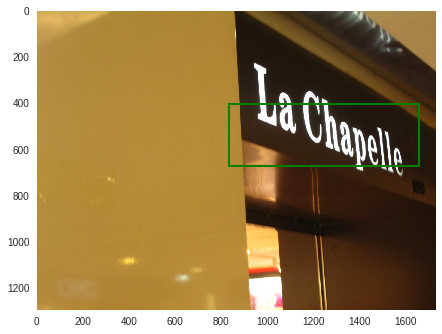

In [38]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def show_img(index):
  '''
  Función para mostrar una imagen con la posición de los textos
  que se encuentran en ella.
  '''
   
  x = []
  y = []
  w = []
  h = []
#   t = []
  
  fig,ax = plt.subplots(1)
  ax.imshow(train_X[index])
  
  if len(train_Y[index].shape) == 1:
    x = train_Y[index][2]
    y = train_Y[index][3]
    w = train_Y[index][4]
    h = train_Y[index][5]
#     t = train_Y[index][6]
    
    rect = patches.Rectangle((x,y),w,h,linewidth=2,edgecolor='g',facecolor='none')
    ax.add_patch(rect)
    
  else:
    n_rect = train_Y[index].shape[0]
    for i in range(n_rect):
      x.append(train_Y[index][i][2])
      y.append(train_Y[index][i][3])
      w.append(train_Y[index][i][4])
      h.append(train_Y[index][i][5])
#       t.append(train_Y[index][i][6])
  
    for p in [
      patches.Rectangle(
          (x[p], y[p]),
          w[p],
          h[p],
          linewidth=2,
          edgecolor='g',
          facecolor='none'
      ) for p in range(n_rect)
    ]:
      ax.add_patch(p)  
    
  ax.grid(b=False)
  plt.show()
  
show_img(0)